In [1]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Streaming output truncated to the last 5000 lines.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/subtask-1/test-

Funciones de carga y preparación de datos

In [2]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt
    que se introduce en su entrada.
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()

  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob).
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


## 0. Imports


In [3]:
!pip install spacy==3.2.1
!python -m spacy download es_core_news_sm
import nltk
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uninstalling pydantic-1.10.13:
      Successfully uninstalled pydantic-1.10.13
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled sp

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from tqdm import tqdm
tqdm.pandas()

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [5]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [6]:
datos_ejercicio.head(4)

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train


## 2. Análisis exploratorio

Empezaremos por realizar un nálisis de los datos previo a la normalización de los mismos. Este análisis nos va a permitir extraer información relevante del dataset, así como posibles inconvenientes que serán solucionados llegado el caso.

*   **Número de documentos y columnas:**



Comenzamos mostrando el número de documentos, o lo que es lo mismo, el número de filas del data frame:

In [7]:
print("Tenemos un conjunto de {} documentos y el dataframe tiene {} columnas".format(len(datos_ejercicio),datos_ejercicio.shape[1]))

Tenemos un conjunto de 8000 documentos y el dataframe tiene 4 columnas



*   **Número de documentos duplicados:**



Despues, comprobamos y eliminamos las filas con algún valor vacío (NA) y quitaremos los duplicados.

In [8]:
print("Existen {} noticias duplicadas".format(np.sum(datos_ejercicio.duplicated(subset=["tweet_text"]))))
# Quitaremos esos duplicados
datos_ejercicio = datos_ejercicio.drop_duplicates()
print("Despues de quitar duplicados tenemos un conjunto de {} noticias".format(datos_ejercicio.shape[0]))

Existen 0 noticias duplicadas
Despues de quitar duplicados tenemos un conjunto de 8000 noticias


Comprobaramos que no hayan quedado Nulls en ningunas de las dos columnas del dataset

In [9]:
print("Hay {} valores vacíos en las noticias y {} valores vacíos en las etiquetas en los datos".format(np.sum(datos_ejercicio.isnull())[0],
                                                                                                        np.sum(datos_ejercicio.isnull())[1]))

Hay 0 valores vacíos en las noticias y 0 valores vacíos en las etiquetas en los datos




*   **Número de documentos por cada clase:**



Contamos el número de elementos de cada clase. Vemos que en la columna "label" nos encontramos las etiquetas del dataset. En este caso nos encontramos dos tipos de documentos (tweets):




*   "Label = 1": Tweets con la mención de profesiones en el tweet
*   "Label = 0": Tweets con niguna mención de profesiones en el tweet



Comprobemos la distribución de las clases:

In [10]:
datos_ejercicio.groupby(["label"]).count()

,tweet_id,tweet_text,set
label,,,
0,6130,6130,6130
1,1870,1870,1870


Visualizacion por medio de un histograma

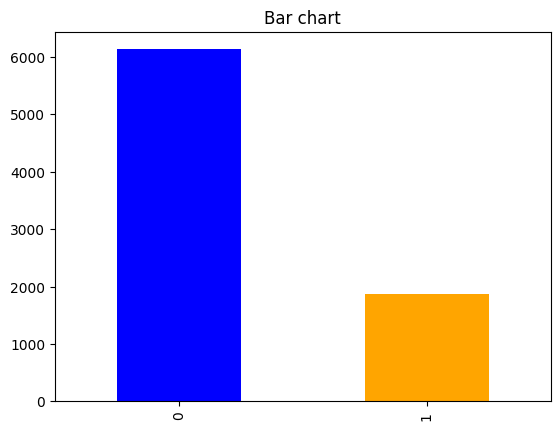

In [11]:
ax, fig = plt.subplots()
etiquetas = datos_ejercicio.label.value_counts()
etiquetas.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

Podemos observar claramente que el dataset no esta balanceado, esto lo trataremos en las siguientes secciones.

Contenido de los tweets

*   **Contenido de los tweets**

Antes de empezar a procesar, vamos a revisar algunos tweets de cada una de las dos clases y sus respectivos wordclouds

Tweets con mención:

In [12]:
datos_ejercicio[datos_ejercicio.label==1].sample(3).tweet_text.to_list()

['¡Zasca! en HoyxHoy SER -Barceló : "Ministra, desde finales Marzo sólo podían entrar en España residentes, personal exclusivo relacionado con la pandemia pero no se ponian en cuarentena"  -Laya:"Confinamiento es Cuarentena y desde el 15 de marzo ya lo hacemos en cada domicilio"',
 'Buenas noches, soy medico de UCI en Malaga tengo 49 años. Acabo de terminar mi turno, y quiero pedirles que nos escuchen @sanidadgob Los médicos estamos contagiando a nuestros pacientes. Pedimos por favor que nos den material suficiente para poder afrontar esta pandemia.',
 '@CouperDx @AbadMaachamon @PSOE @salvadorilla El momento es grave. Ahora mismo, sumando al Amado Líder Indecente y a su ViceKomisario Coletas, el gobierno de España tiene menos cerebro que Corea del Norte. La PESTE ROJA es incluso peor que el virus de Wuhan.']

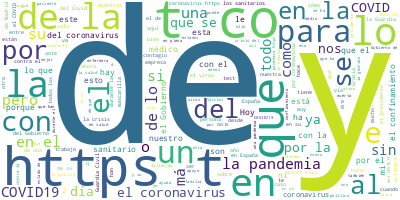

In [13]:
tweet_mencion = datos_ejercicio[datos_ejercicio.label==1].tweet_text.to_list()
# Une las frases
long_string = ','.join(tweet_mencion)
# Genera un objecto WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')
# Genera el wordcloud
wordcloud.generate(long_string)
# Visualizalo en una imagen
wordcloud.to_image()

Tweets sin mención:

In [14]:
datos_ejercicio[datos_ejercicio.label==0].sample(3).tweet_text.to_list()

['Alemania acusa a Sánchez de propagar la pandemia por no querer anular el 8-M  https://t.co/AQ7PZo02rW',
 'Mi tía de 93 años da anticuerpos en el test serológico. Ha pasado el coronavirus y ni se ha enterado: asintomática. Por favor, admitan que no tienen ni puta idea y déjennos vivir sin mascarillas. Vale ya, ignorantes, manipuladores hijos de puta. Vale ya.',
 '#COVID19 y el confinamiento genera cambios temporales en patrones de género en la casa. ¿Perdurará este cambio? @MartaPastor @Ellaspuedenrne @TalengoINT']

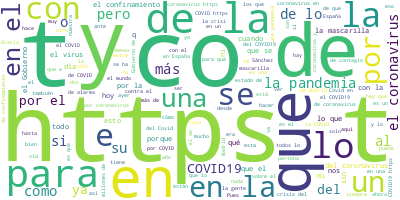

In [15]:
tweet_no_mencion = datos_ejercicio[datos_ejercicio.label==0].tweet_text.to_list()
# Une las frases
long_string = ','.join(tweet_no_mencion)
# Genera un objecto WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')
# Genera el wordcloud
wordcloud.generate(long_string)
# Visualizalo en una imagen
wordcloud.to_image()

Como observamos de ambos wordclouds, tenemos una presencia alta de stopwords y de URLs, los cuales seran tratados en las secciones posteriores.



*   **Distribución de la longitud de los tweet en caracteres:**


Para seguir con el análisis exploratorio, vamos a hacer un cálculo típico: la longitud de cada uno de los textos de los documentos para despues dibujar su histograma.

Comenzamos creando las columnas que van a almacenar las longitud en caracteres y en tokens de los documentos del corpus:

In [16]:
datos_ejercicio["char_len"] = datos_ejercicio["tweet_text"].apply(lambda x: len(x))

<ipython-input-17-5e27ce154707>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(datos_ejercicio[datos_ejercicio.label==0].char_len, hist=True, label="no_mencion")
<ipython-input-17-5e27ce154707>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(datos_ejercicio[datos_ejercicio.label

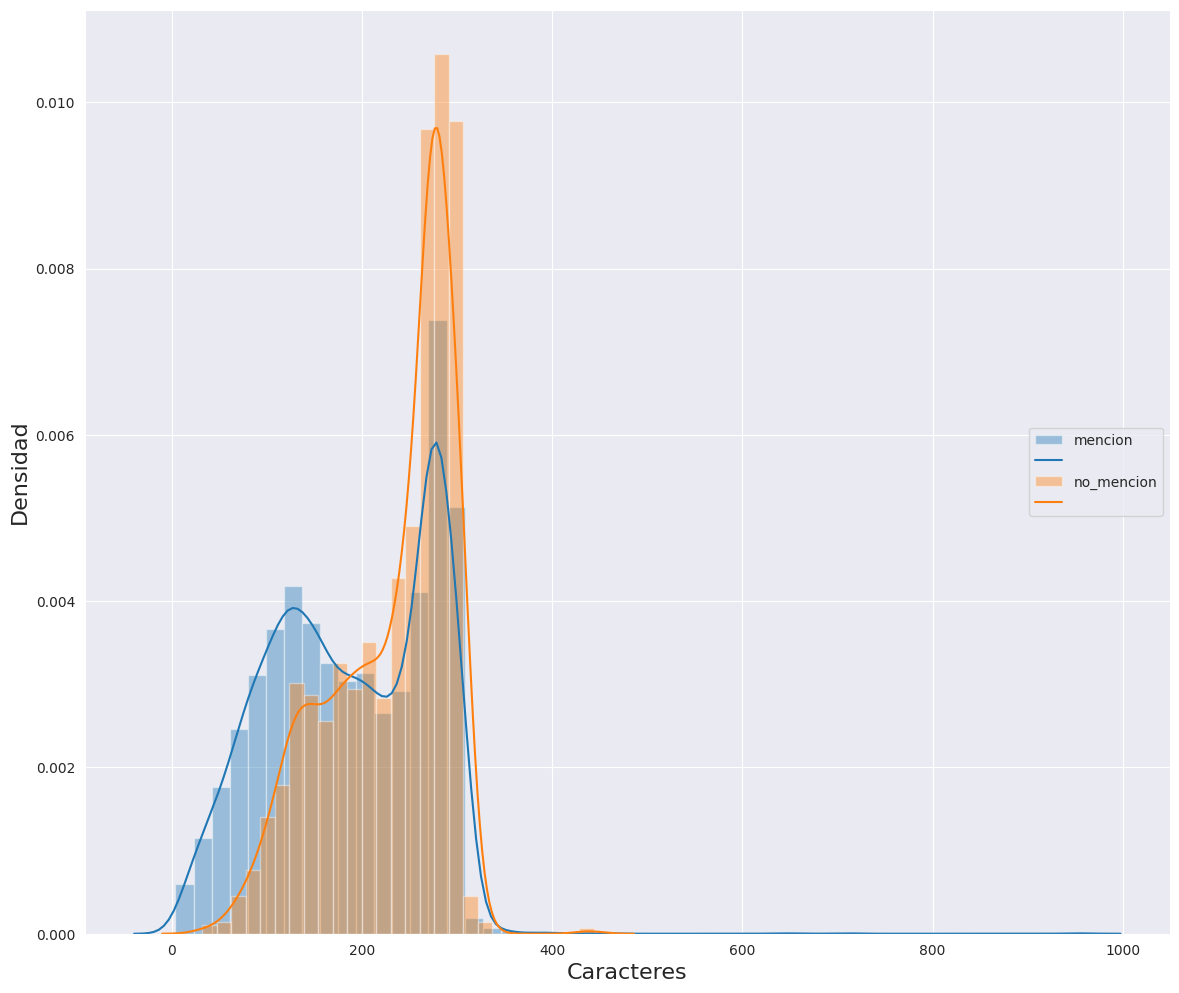

In [17]:
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len
plt1 = sns.distplot(datos_ejercicio[datos_ejercicio.label==0].char_len, hist=True, label="no_mencion")
plt2 = sns.distplot(datos_ejercicio[datos_ejercicio.label==1].char_len, hist=True, label="mencion")
plt.legend(labels=['mencion',"",'no_mencion',""], loc = 5)


# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

Se puede apreciar que la densidad en los tweets con ninguna mencion es un poco mas alta que la de los que si la menciona.

## 3. Preprocesado y Normalización

Vamos a proceder a normalizar los datos. Para ello vamos a utilizar las siguientes funciones vistas en clase las cuales realizan las siguientes acciones:
* Eliminar espacios extra
* Transformar a minúsculas
* Eliminados emojis ya que no analizaremos sentimientos
* Tokenizar
* Quitar stop words
* Quitar puntuación
* Lematizar

In [18]:
# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

# Eliminar los emojis de un texto.
def clean_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F300-\U0001F6FF"  # symbols & pictographs
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u'\u2600-\u26FF\u2700-\u27BF'
        u'\u2934' u'\u2935' u'\u2B05' u'\u2B06' u'\u2B07' u'\u2B1B' u'\u2B1C'
        u'\u2B50' u'\u2B55' u'\u3030' u'\u303D' u'\u3297' u'\u3299' u'\u00A9'
        u'\u00AE' u'\u203C' u'\u2049' u'\u2122' u'\u2139' u'\u2194-\u2199'
        u'\u21A9' u'\u21AA' u'\u231A' u'\u231B' u'\u2328' u'\u23CF'
        u'\u23E9-\u23F3' u'\u23F8' u'\u23F9' u'\u23FA' u'\u24C2' u'\u25AA'
        u'\u25AB' u'\u25B6' u'\u25C0' u'\u25FB' u'\u25FD' u'\u25FC' u'\u25FE'
        ']+', flags=re.UNICODE)
    string2 = re.sub(emoji_pattern,r' ',text)
    return string2

# Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
from nltk.tokenize import TweetTokenizer
def tokenize(text):
  tweet_tokenizer =  TweetTokenizer()
  tokens_list = tweet_tokenizer.tokenize(text)
  return tokens_list

# Quitar stop words
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish'))
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

# Eliminar signos de puntuación (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words

# Lemmatization
import spacy
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return mytokens

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


Primeramente eliminamos emojis ya que no analizaremos sentimientos

In [19]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text"].apply(lambda x: clean_emoji(x))

Luego eliminamos espacios extra y transformamos a minúsculas

In [20]:
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: eliminar_espacios(x))
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: texto_to_lower(x))

Seguidamente tokenizamos y procesamos los tokens

In [21]:
datos_ejercicio["tweet_text_tokenize"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: tokenize(x))
datos_ejercicio["tweet_text_tokenize"] = datos_ejercicio["tweet_text_tokenize"].apply(lambda x: quitar_stopwords(x))
datos_ejercicio["tweet_text_tokenize"] = datos_ejercicio["tweet_text_tokenize"].apply(lambda x: quitar_puntuacion(x))

Finalmente lematizamos

In [22]:
datos_ejercicio["tweet_lematized"] = datos_ejercicio["tweet_text_tokenize"].apply(lambda x: lematizar(x))

<ipython-input-24-119e7ed90bdf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt1 = sns.distplot(datos_ejercicio[datos_ejercicio.label==0].token_len, hist=True, label="no_mencion")
<ipython-input-24-119e7ed90bdf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt2 = sns.distplot(datos_ejercicio[datos_ejercicio.labe

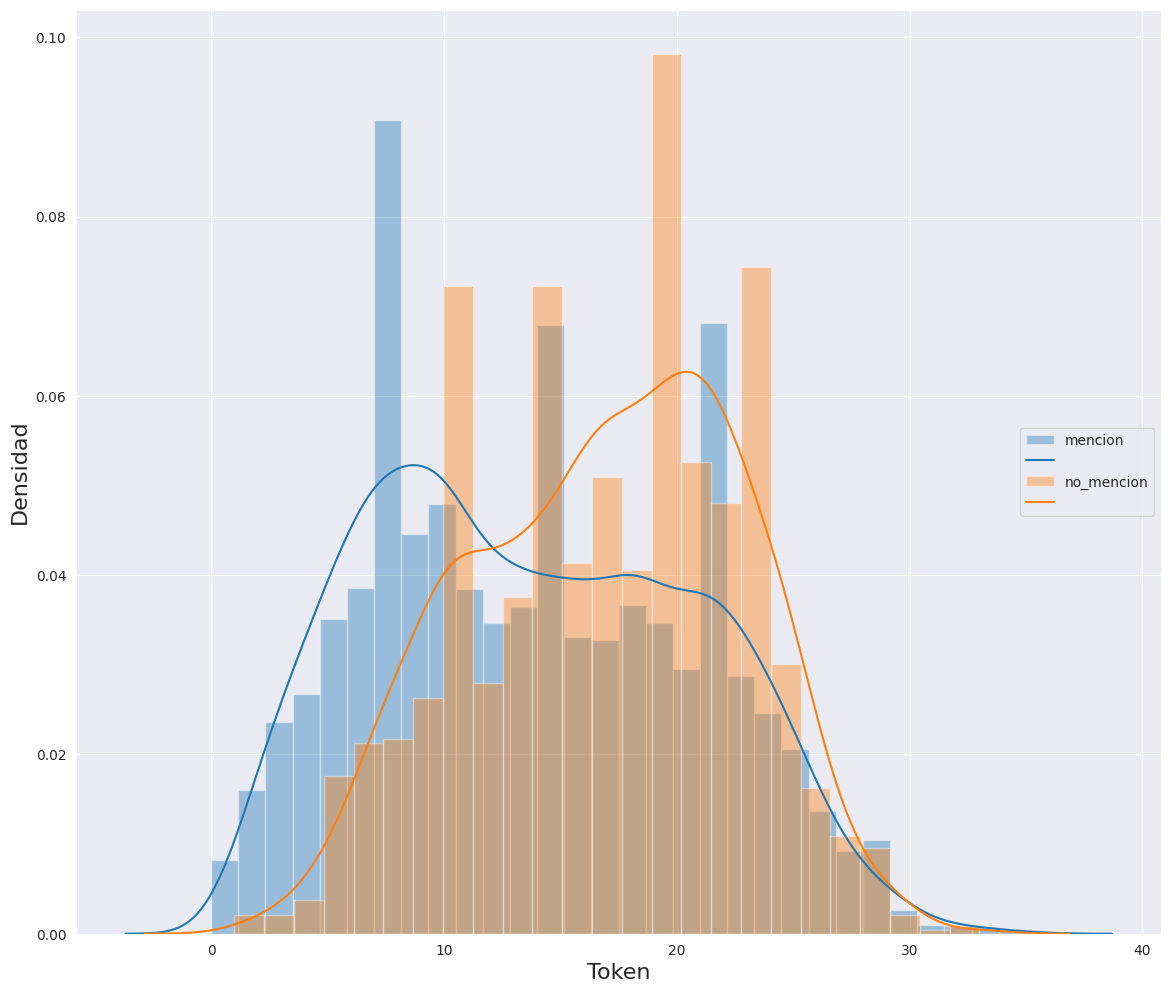

In [24]:
datos_ejercicio["token_len"] = datos_ejercicio["tweet_lematized"].apply(lambda x: len(x))

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
plt1 = sns.distplot(datos_ejercicio[datos_ejercicio.label==0].token_len, hist=True, label="no_mencion")
plt2 = sns.distplot(datos_ejercicio[datos_ejercicio.label==1].token_len, hist=True, label="mencion")
plt.legend(labels=['mencion',"",'no_mencion',""], loc = 5)

# Definimos el título de los ejes:
plt.xlabel('Token', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

plt.show()

Comparando este grafico con el anterior se puede observar que con el procesamiento de los datos esta diferencia de densidades se reduce, lo cual indica que ambos tweets no tienen grandes diferencias en terminos de longitud.

## 4. Vectorización

Debido a que el texto esta en el idioma espanol, utilizaremos el Word2Vec embedding en español.

In [25]:
!wget https://zenodo.org/record/7884437/files/complete.bin.zip?download=1
!unzip /content/complete.bin.zip?download=1

--2023-11-02 18:02:27--  https://zenodo.org/record/7884437/files/complete.bin.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.10.78, 188.185.33.206, 188.185.22.33, ...
Connecting to zenodo.org (zenodo.org)|188.185.10.78|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7884437/files/complete.bin.zip [following]
--2023-11-02 18:02:28--  https://zenodo.org/records/7884437/files/complete.bin.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 2905851437 (2.7G) [application/octet-stream]
Saving to: ‘complete.bin.zip?download=1’

complete.bin.zip?do 100%[===================>]   2.71G  29.8MB/s    in 95s     

2023-11-02 18:04:03 (29.1 MB/s) - ‘complete.bin.zip?download=1’ saved [2905851437/2905851437]

Archive:  /content/complete.bin.zip?download=1
  inflating: complete.bin            


Cargamos los KeyedVectors, para ahorrar espacio de almacenamiento y memoria ya que los almacena como un diccionario.

In [26]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('complete.bin', binary=True)

Utilizaremos vista en clase para obtener el vector asociado a cada documento tomando el promedio de los tokens.

In [30]:
def get_average_vector(sentence):
  lista = list()
  # Iteramos por cada token
  for i in sentence:
    # Introducimos cada token en un lista
    try:
      lista.append(word_vectors.get_vector(i) )
    except:
      continue
    # Calculamos su media
  try:
    resultado = np.mean(lista, axis=0)
  except:
    # Si no ha encontrado ningún valor, creamos un array de  0 (mismo tamaño que el vector)
    resultado = np.zeros(400)
  return resultado

In [32]:
datos_ejercicio["embeddings"] = datos_ejercicio["tweet_lematized"].progress_apply(lambda x: get_average_vector(x))

  0%|          | 0/8000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
100%|██████████| 8000/8000 [00:00<00:00, 13558.99it/s]


Generamos un nuevo dataframe donde las filas representaran el numero de documentos y las dimensiones que en este caso son 400.

In [41]:
vector_data = datos_ejercicio.embeddings.apply(pd.Series)

Rellenamos algun valor vacio o NA que ha aparecido por error

In [42]:
vector_data = vector_data.fillna(0)

Utilizamos la librería scipy (función sparse.hstack) para generar una matriz X que utilizaremos para hacer el train-test split posteriormente:

In [43]:
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y = datos_ejercicio["label"].values.astype(np.float32)
X = sp.sparse.csc_matrix(vector_data)

####Division de Train/Test

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6000, 400)
(2000, 400)


####Rebalanceo de Clases

Debido al desbalanceo identificado en las partes posteriores de este ejercicio, entrenaremos un modelo sencillo para verificar que el desbalanceo efectivamente genera un problema de rendimiento.


In [46]:
# Cargamos
from imblearn.over_sampling import SMOTE
# Creamos objetos
sm = SMOTE(random_state=42)
# Retransformamos
X_res, y_res = sm.fit_resample(X_train, y_train)  # fit_resample(X_train, y_train)

Observamos el resultado del rebalanceo:

In [47]:
np.array(np.unique(y_res, return_counts=True)).T

array([[0.000e+00, 4.587e+03],
       [1.000e+00, 4.587e+03]])

## 5. Entrenamiento y evaluación de modelos


**Decision de modelo de ML a utilizar**

En primer lugar se ha generado una función para medir la calidad de varios modelos estándar de forma fácil y ver sus resultados.

La función hace un KFold y evalua diferentes modelos con una métrica de evaluación:

In [59]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un Kfold
          KF = KFold(n_splits = 8, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Una vez definida la función, podemos definir los modelos con los que hacer la evaluación. En este caso hemos incorporado la regresión logística, naive bayes y support vector machine.

In [85]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)),
         ("GaussianNB",GaussianNB()),
         ("SupportVectorMachine",svm.SVC())
]

evaluation_score = "f1"

model_evaluation(models,  evaluation_score, X_res.toarray(), y_res)

Metric: f1 , KFold 
Logistic: 0.831968 (0.010080) 
Metric: f1 , KFold 
GaussianNB: 0.763654 (0.011847) 
Metric: f1 , KFold 
SupportVectorMachine: 0.890388 (0.007856) 


([array([0.83737024, 0.83274021, 0.83108108, 0.84568439, 0.81174439,
         0.82136895, 0.83666062, 0.83909014]),
  array([0.73783359, 0.76038339, 0.76510067, 0.76153846, 0.77861446,
         0.77414562, 0.77272727, 0.75888717]),
  array([0.87697715, 0.8981064 , 0.88774636, 0.90344828, 0.88376068,
         0.88701518, 0.89108911, 0.89496157])],
 ['Logistic', 'GaussianNB', 'SupportVectorMachine'])

Observamos un mejor funcionamiento con Suport Vector Machine, que será con el que intentaremos afinar los hiperparámetros:



```
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = svm.SVC()
gammas= ['scale', 'auto']
kernels= ['rbf']
c_values = [100, 10, 1.0, 0.1, 0.01]
```

Vamos a generar un diccionario para la búsqueda Grid y también generaremos el objeto GridSearchCV. Vamos a utilizar una métrica de búsqueda basada en f1 debido al rebalanceo

```
grid = dict(gamma=gammas,C=c_values,kernel=kernels)
cv = KFold(n_splits=8)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
```

Entrenamos el modelo y hacemos un "print" del mejor resultado:

```
grid_result = grid_search.fit(X_res, y_res)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))
```

Pero debido a limitacion de poder computacional el grid_search.fit estaba tomando mas de 40 minutos.

A pesar de que SVM era el de mejor resultado usaremos el segundo mejor, Logistic Regression, para tratar de superar el valor de SVM.

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

Vamos a generar un diccionario para la búsqueda Grid y también generaremos el objeto GridSearchCV. Vamos a utilizar una métrica de búsqueda basada en f1 debido al rebalanceo

In [88]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=8)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

Entrenamos el modelo y hacemos un "print" del mejor resultado:

In [89]:
grid_result = grid_search.fit(X_res, y_res)
# summarize results
print("Mejor f1: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor f1: 0.739313 usando los parámetros {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


Debido a que los valores del SVM siguen siendo mejores nos quedaremos con el modelo de SVM y entrenamos un modelo específico:

In [90]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=svm.SVC()
model.fit(X_res,y_res)


SVC()

Predecimos sobre nuestros datos de test y observamos el funcionamiento del modelo general por medio de un Confusion Matrix y un classification report.

In [91]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1367  176]
 [ 115  342]]
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      1543
         1.0       0.66      0.75      0.70       457

    accuracy                           0.85      2000
   macro avg       0.79      0.82      0.80      2000
weighted avg       0.86      0.85      0.86      2000



Finalmente observamos que nuestra precision de la clase de interes, 1.0, es de 0.66, pero con f1-score bastante aceptable.